In [ ]:
!pip install numpy==1.24.0
!pip install pmdarima

  Using cached pmdarima-2.0.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_28_x86_64.whl.metadata (7.8 kB)
Using cached pmdarima-2.0.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_28_x86_64.whl (2.2 MB)


In [ ]:
import pandas as pd
import numpy as np
import pmdarima as pm
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from pmdarima.arima import auto_arima
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf,month_plot

In [ ]:
!pip install arch
from arch.unitroot import ADF,KPSS

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 985.3/985.3 kB 16.5 MB/s eta 0:00:00


In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.holtwinters import  Holt
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [16]:
veri = pd.read_excel("/content/EVDS (11) (1).xlsx")
print(veri)

       Tarih      Dolar
0    2010-01   1.473400
1    2010-02   1.512830
2    2010-03   1.535678
3    2010-04   1.495048
4    2010-05   1.542210
..       ...        ...
164  2023-09  26.989448
165  2023-10  27.846114
166  2023-11  28.637082
167  2023-12  29.074857
168  2024-01  30.053750

[169 rows x 2 columns]


In [17]:
endeks = pd.read_excel("/content/EVDS (12) (1).xlsx")
print(endeks)

       Tarih   ENDEKS
0    2010-01   540.28
1    2010-02   493.84
2    2010-03   569.89
3    2010-04   587.63
4    2010-05   540.34
..       ...      ...
164  2023-09  8334.94
165  2023-10  7514.10
166  2023-11  7948.60
167  2023-12  7470.18
168  2024-01  8496.66

[169 rows x 2 columns]


In [18]:
tüfe = pd.read_excel("/content/EVDS (13) (1).xlsx")
print(tüfe)

       Tarih     TÜFE
0    2010-01   174.07
1    2010-02   176.59
2    2010-03   177.62
3    2010-04   178.68
4    2010-05   178.04
..       ...      ...
164  2023-09  1691.04
165  2023-10  1749.11
166  2023-11  1806.50
167  2023-12  1859.38
168  2024-01  1984.02

[169 rows x 2 columns]


In [19]:
data = pd.DataFrame()
data["Dolar/TL"] = veri["Dolar"]
data["Bist100"] = endeks["ENDEKS"]
data["Tüfe"] = tüfe["TÜFE"]
print(data)

      Dolar/TL  Bist100     Tüfe
0     1.473400   540.28   174.07
1     1.512830   493.84   176.59
2     1.535678   569.89   177.62
3     1.495048   587.63   178.68
4     1.542210   540.34   178.04
..         ...      ...      ...
164  26.989448  8334.94  1691.04
165  27.846114  7514.10  1749.11
166  28.637082  7948.60  1806.50
167  29.074857  7470.18  1859.38
168  30.053750  8496.66  1984.02

[169 rows x 3 columns]


In [20]:
print(data.isnull().sum())

Dolar/TL    0
Bist100     0
Tüfe        0
dtype: int64


In [22]:
tarih = pd.date_range(start="01.01.2010",periods=len(veri["Tarih"]),freq="M")
data["Tarih"] = tarih
data.set_index("Tarih",inplace=True)
print(data)

             Dolar/TL  Bist100     Tüfe
Tarih                                  
2010-01-31   1.473400   540.28   174.07
2010-02-28   1.512830   493.84   176.59
2010-03-31   1.535678   569.89   177.62
2010-04-30   1.495048   587.63   178.68
2010-05-31   1.542210   540.34   178.04
...               ...      ...      ...
2023-09-30  26.989448  8334.94  1691.04
2023-10-31  27.846114  7514.10  1749.11
2023-11-30  28.637082  7948.60  1806.50
2023-12-31  29.074857  7470.18  1859.38
2024-01-31  30.053750  8496.66  1984.02

[169 rows x 3 columns]


/tmp/ipython-input-22-2059666525.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  tarih = pd.date_range(start="01.01.2010",periods=len(veri["Tarih"]),freq="M")


In [23]:
print(data.corr())

          Dolar/TL   Bist100      Tüfe
Dolar/TL  1.000000  0.950691  0.994470
Bist100   0.950691  1.000000  0.967681
Tüfe      0.994470  0.967681  1.000000


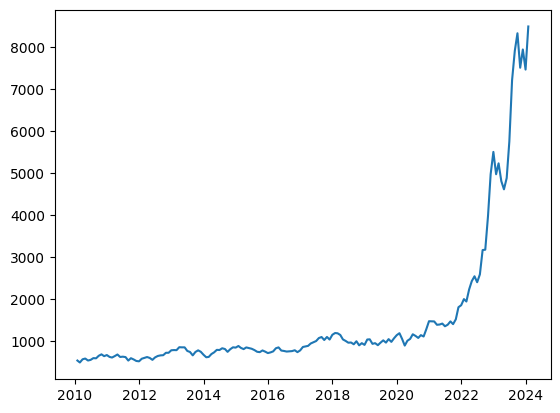

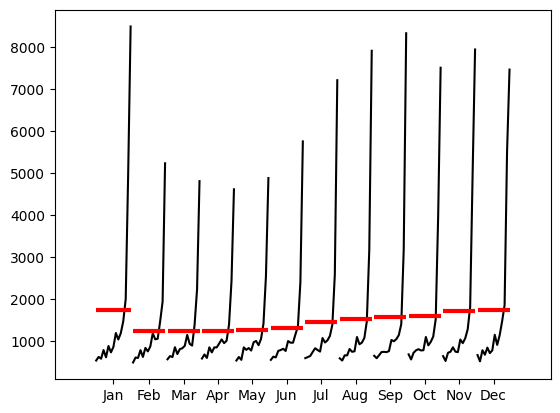

In [24]:
plt.plot(data["Bist100"])
month_plot(data["Bist100"])
plt.show()

In [25]:
adf = ADF(data["Bist100"])
kpss = KPSS(data["Bist100"])
print(adf)
print(kpss)

   Augmented Dickey-Fuller Results   
Test Statistic                  4.793
P-value                         1.000
Lags                               14
-------------------------------------

Trend: Constant
Critical Values: -3.47 (1%), -2.88 (5%), -2.58 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.
    KPSS Stationarity Test Results   
Test Statistic                  1.008
P-value                         0.002
Lags                                8
-------------------------------------

Trend: Constant
Critical Values: 0.74 (1%), 0.46 (5%), 0.35 (10%)
Null Hypothesis: The process is weakly stationary.
Alternative Hypothesis: The process contains a unit root.


In [26]:
fark = data["Bist100"].diff().dropna()
adf2 = ADF(fark)
kpss2 = KPSS(fark)
print(adf2)
print(kpss2)

   Augmented Dickey-Fuller Results   
Test Statistic                  3.960
P-value                         1.000
Lags                               14
-------------------------------------

Trend: Constant
Critical Values: -3.47 (1%), -2.88 (5%), -2.58 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.
    KPSS Stationarity Test Results   
Test Statistic                  1.120
P-value                         0.001
Lags                                1
-------------------------------------

Trend: Constant
Critical Values: 0.74 (1%), 0.46 (5%), 0.35 (10%)
Null Hypothesis: The process is weakly stationary.
Alternative Hypothesis: The process contains a unit root.


In [27]:
fark2 = data["Bist100"].diff().diff().dropna()
adf3 = ADF(fark2)
kpss3 = KPSS(fark2)
print(adf3)
print(kpss3)

   Augmented Dickey-Fuller Results   
Test Statistic                 -4.862
P-value                         0.000
Lags                               13
-------------------------------------

Trend: Constant
Critical Values: -3.47 (1%), -2.88 (5%), -2.58 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.
    KPSS Stationarity Test Results   
Test Statistic                  0.342
P-value                         0.104
Lags                               88
-------------------------------------

Trend: Constant
Critical Values: 0.74 (1%), 0.46 (5%), 0.35 (10%)
Null Hypothesis: The process is weakly stationary.
Alternative Hypothesis: The process contains a unit root.


In [29]:
from sklearn.model_selection import TimeSeriesSplit
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import warnings
warnings.filterwarnings("ignore")

In [32]:
tscv = TimeSeriesSplit(n_splits=5)

def hata(y,tahmin):
  mse = mean_squared_error(y,tahmin)
  rmse = np.sqrt(mse)
  mae = mean_absolute_error(y,tahmin)
  return mse,rmse,mae

mse = []
rmse = []
mae = []

for train_index,test_index in tscv.split(data["Bist100"]):
  x_train,x_test = data["Bist100"].iloc[train_index],data["Bist100"].iloc[test_index]
  model = Holt(x_train).fit(optimized=True,use_brute=True)
  tahmin = model.forecast(len(x_test))
  hatason =hata(x_test,tahmin)
  mse.append(hatason[0])
  rmse.append(hatason[1])
  mae.append(hatason[2])
print("Ortalama MSE :",np.mean(mse))
print("Ortalama RMSE:",np.mean(rmse))
print("Ortalama MAE :",np.mean(mae))






Ortalama MSE : 2770871.5589940986
Ortalama RMSE: 925.5864852502807
Ortalama MAE : 760.3474148389262


In [33]:
mse2 = []
rmse2 = []
mae2 = []

for train_index,test_index in tscv.split(data["Bist100"]):
  x_train,x_test = data["Bist100"].iloc[train_index],data["Bist100"].iloc[test_index]
  model = ExponentialSmoothing(x_train,trend="add",seasonal="add",seasonal_periods=12).fit(optimized=True,use_brute=True)
  tahmin = model.forecast(len(x_test))
  hatason =hata(x_test,tahmin)
  mse2.append(hatason[0])
  rmse2.append(hatason[1])
  mae2.append(hatason[2])
print("Ortalama MSE :",np.mean(mse2))
print("Ortalama RMSE:",np.mean(rmse2))
print("Ortalama MAE :",np.mean(mae2))

Ortalama MSE : 2853811.787925758
Ortalama RMSE: 894.3321845544257
Ortalama MAE : 728.2107145015489


In [38]:
mse3 = []
rmse3 = []
mae3 = []

for train_index,test_index in tscv.split(data["Bist100"]):
  x_train,x_test = data["Bist100"].iloc[train_index],data["Bist100"].iloc[test_index]
  x_trainexoq,x_testexoq = data["Dolar/TL"].iloc[train_index],data["Dolar/TL"].iloc[test_index]
  x_trainexoq = np.array(x_trainexoq).reshape(-1,1)
  x_testexoq = np.array(x_testexoq).reshape(-1,1)
  model = auto_arima(x_train,seasonal=True,trace=False,X=x_trainexoq)
  tahmin = model.predict(len(x_test),X=x_testexoq)
  hatason =hata(x_test,tahmin)
  mse3.append(hatason[0])
  rmse3.append(hatason[1])
  mae3.append(hatason[2])
print("Ortalama MSE :",np.mean(mse3))
print("Ortalama RMSE:",np.mean(rmse3))
print("Ortalama MAE :",np.mean(mae3))

Ortalama MSE : 4056805.4249527715
Ortalama RMSE: 1162.8908797194183
Ortalama MAE : 980.5602222759583


In [41]:
mse4 = []
rmse4 = []
mae4 = []

for train_index,test_index in tscv.split(data["Bist100"]):
  x_train,x_test = data["Bist100"].iloc[train_index],data["Bist100"].iloc[test_index]
  x_trainexoq,x_testexoq = data["Tüfe"].iloc[train_index],data["Tüfe"].iloc[test_index]
  x_trainexoq = np.array(x_trainexoq).reshape(-1,1)
  x_testexoq = np.array(x_testexoq).reshape(-1,1)
  model = auto_arima(x_train,seasonal=True,trace=False,X=x_trainexoq)
  tahmin = model.predict(len(x_test),X=x_testexoq)
  hatason =hata(x_test,tahmin)
  mse4.append(hatason[0])
  rmse4.append(hatason[1])
  mae4.append(hatason[2])
print("Ortalama MSE :",np.mean(mse4))
print("Ortalama RMSE:",np.mean(rmse4))
print("Ortalama MAE :",np.mean(mae4))

Ortalama MSE : 1235316.7770782937
Ortalama RMSE: 609.0544656151626
Ortalama MAE : 483.03600393374984


In [42]:

for i in range(1,13):
  smodel= auto_arima(data['Bist100'],seasonal=True,m=i,trace=False,X=np.array(data["Tüfe"]).reshape(-1,1))
  print("m {} için aic {}".format(i,smodel.aic()))

m 1 için aic 2197.6729957705993
m 2 için aic 2237.0601325206867
m 3 için aic 2221.3439647249106
m 4 için aic 2190.0723493638843
m 5 için aic 2173.091915244776
m 6 için aic 2197.6729957705993
m 7 için aic 2142.1425983006293
m 8 için aic 2201.9047876255627
m 9 için aic 2197.1763949038777
m 10 için aic 2192.598801238033
m 11 için aic 2201.9047876255627
m 12 için aic 2218.602251580774


In [44]:
for i in range(2,13):
  smodel= ExponentialSmoothing(data['Bist100'],trend="add",seasonal="add",seasonal_periods=i).fit(optimized=True,use_brute=True)
  print("m {} için aic {}".format(i,smodel.aic))

m 2 için aic 1838.3613015788046
m 3 için aic 1844.1451384267039
m 4 için aic 1842.0390640449712
m 5 için aic 1844.0285637164413
m 6 için aic 1844.5702256730328
m 7 için aic 1844.9748271851297
m 8 için aic 1844.7123613992883
m 9 için aic 1848.6983784557615
m 10 için aic 1851.6005714785153
m 11 için aic 1849.440330370768
m 12 için aic 1859.4241121153527


In [46]:
model1 = Holt(data['Bist100']).fit(optimized=True,use_brute=True)
model2 = ExponentialSmoothing(data['Bist100'],trend="add",seasonal="add",seasonal_periods=2).fit(optimized=True,use_brute=True)
model3 = auto_arima(data['Bist100'],seasonal=False,trace=False,X=np.array(data["Tüfe"]).reshape(-1,1))
model4 = auto_arima(data['Bist100'],seasonal=True,m=7,trace=False,X=np.array(data["Tüfe"]).reshape(-1,1))
print(model1.aic)
print(model2.aic)
print(model3.aic())
print(model4.aic())

1835.473579624866
1838.3613015788046
2197.6729957705993
2142.1425983006293


In [47]:
print(model4.summary())

                                       SARIMAX Results                                        
Dep. Variable:                                      y   No. Observations:                  169
Model:             SARIMAX(3, 0, 0)x(1, 1, [1, 2], 7)   Log Likelihood               -1062.071
Date:                                Wed, 02 Jul 2025   AIC                           2142.143
Time:                                        13:21:13   BIC                           2169.931
Sample:                                    01-31-2010   HQIC                          2153.425
                                         - 01-31-2024                                         
Covariance Type:                                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    -26.1103     11.229     -2.325      0.020     -48.119      -4.101
x1 

In [48]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model5 = SARIMAX(data['Bist100'],exoq=data["Tüfe"],order=(3,0,0),seasonal_order=(1,1,[1,2],7)).fit()
print(model5.summary())


                                       SARIMAX Results                                        
Dep. Variable:                                Bist100   No. Observations:                  169
Model:             SARIMAX(3, 0, 0)x(1, 1, [1, 2], 7)   Log Likelihood               -1085.059
Date:                                Wed, 02 Jul 2025   AIC                           2184.118
Time:                                        13:25:08   BIC                           2205.731
Sample:                                    01-31-2010   HQIC                          2192.893
                                         - 01-31-2024                                         
Covariance Type:                                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.1764      0.058     20.327      0.000       1.063       1.290
ar.

In [49]:
q = acorr_ljungbox(model5.resid)
print(q)

      lb_stat  lb_pvalue
1    0.018772   0.891021
2    0.310237   0.856314
3    1.127452   0.770452
4    6.825886   0.145380
5   12.234004   0.031718
6   12.303532   0.055530
7   12.918167   0.074128
8   13.153816   0.106666
9   32.729528   0.000149
10  34.113472   0.000177


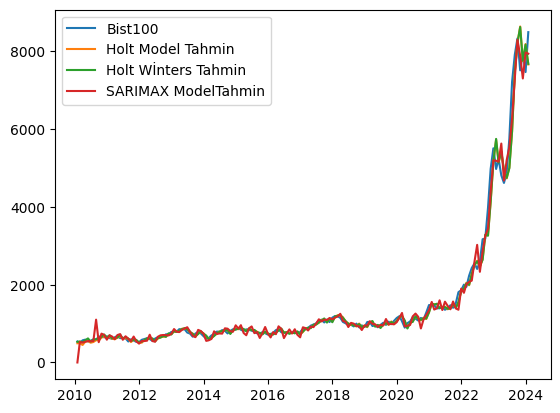

In [54]:
tahmin1 = model1.predict(start=data.index[0],end=data.index[len(data)-1])
tahmin2 = model2.predict(start=data.index[0],end=data.index[len(data)-1])
tahmin3 = model5.predict(exog=data["Tüfe"],start=data.index[0],end=data.index[len(data)-1])

df = pd.DataFrame()
df["Bist100"] = data["Bist100"]
df["Holt Model Tahmin"] = tahmin1
df["Holt Wİnters Tahmin"] = tahmin2
df["SARIMAX ModelTahmin"] = tahmin3


plt.plot(df)
plt.legend(df.columns)
plt.show()